**Prereqs**

List all the modules needed to run the below notebook.

Authors:
Project Description:
Who built what?
Analysis

**Import Modules**

In [1]:
import pandas as pd
import sqlite3
import zipfile

**Read in the wildfire dataset and display columns**

- Download dataset from https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires/data
- unzip into /data directory

In [2]:
# # extract the zipped dataset
with zipfile.ZipFile('./data/archive.zip', 'r') as zipped:
    zipped.extractall('./data/')

In [3]:
# connect to the sqlite database
conn = sqlite3.connect('data/FPA_FOD_20170508.sqlite')

In [4]:
tables = pd.read_sql_query(
    """
    SELECT name FROM sqlite_master WHERE type='table'
    """
    , conn)

In [5]:
# Print out the table names
# tables

**Utilizing Fires Table**

In [6]:
# read in the fires table
wildfireDf = pd.read_sql_query(
    """
    SELECT * 
    FROM fires
    """
    , conn)

**Exploratory Data Analysis**
Display the first 5 rows

In [7]:
# wildfireDf.head(5)

OBJECTID  FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM  \
0         1       1  FS-1418826                FED   FS-FIRESTAT   
1         2       2  FS-1418827                FED   FS-FIRESTAT   
2         3       3  FS-1418835                FED   FS-FIRESTAT   
3         4       4  FS-1418845                FED   FS-FIRESTAT   
4         5       5  FS-1418847                FED   FS-FIRESTAT   

  NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME  \
0                    FS                USCAPNF    Plumas National Forest   
1                    FS                USCAENF  Eldorado National Forest   
2                    FS                USCAENF  Eldorado National Forest   
3                    FS                USCAENF  Eldorado National Forest   
4                    FS                USCAENF  Eldorado National Forest   

  SOURCE_REPORTING_UNIT SOURCE_REPORTING_UNIT_NAME  ... FIRE_SIZE_CLASS  \
0                  0511     Plumas National Forest  ...               A   
1                  0503   Eldorado National Forest  ...               A   
2                  0503   Eldorado National Forest  ...               A   
3                  0503   Eldorado National Forest  ...               A   
4                  0503   Eldorado National Forest  ...               A   

    LATITUDE   LONGITUDE OWNER_CODE       OWNER_DESCR STATE COUNTY FIPS_CODE  \
0  40.036944 -121.005833        5.0              USFS    CA     63       063   
1  38.933056 -120.404444        5.0              USFS    CA     61       061   
2  38.984167 -120.735556       13.0  STATE OR PRIVATE    CA     17       017   
3  38.559167 -119.913333        5.0              USFS    CA      3       003   
4  38.559167 -119.933056        5.0              USFS    CA      3       003   

   FIPS_NAME                                              Shape  
0     Plumas  b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...  
1     Placer  b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...  
2  El Dorado  b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...  
3     Alpine  b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...  
4     Alpine  b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...  

[5 rows x 39 columns]

In [8]:
# Describe the dataset
# wildfireDf.describe

<bound method NDFrame.describe of          OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0               1          1         FS-1418826                FED   
1               2          2         FS-1418827                FED   
2               3          3         FS-1418835                FED   
3               4          4         FS-1418845                FED   
4               5          5         FS-1418847                FED   
...           ...        ...                ...                ...   
1880460   1880461  300348363  2015CAIRS29019636             NONFED   
1880461   1880462  300348373  2015CAIRS29217935             NONFED   
1880462   1880463  300348375  2015CAIRS28364460             NONFED   
1880463   1880464  300348377  2015CAIRS29218079             NONFED   
1880464   1880465  300348399  2015CAIRS26733926             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0         FS-FIRESTAT                    FS            

In [9]:
#dropping duplicates
wildfireAnalysisDf = wildfireDf.drop_duplicates()

In [10]:
# wildfireAnalysisDf.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [11]:
# wildfireAnalysisDf.describe

<bound method NDFrame.describe of          OBJECTID     FOD_ID             FPA_ID SOURCE_SYSTEM_TYPE  \
0               1          1         FS-1418826                FED   
1               2          2         FS-1418827                FED   
2               3          3         FS-1418835                FED   
3               4          4         FS-1418845                FED   
4               5          5         FS-1418847                FED   
...           ...        ...                ...                ...   
1880460   1880461  300348363  2015CAIRS29019636             NONFED   
1880461   1880462  300348373  2015CAIRS29217935             NONFED   
1880462   1880463  300348375  2015CAIRS28364460             NONFED   
1880463   1880464  300348377  2015CAIRS29218079             NONFED   
1880464   1880465  300348399  2015CAIRS26733926             NONFED   

        SOURCE_SYSTEM NWCG_REPORTING_AGENCY NWCG_REPORTING_UNIT_ID  \
0         FS-FIRESTAT                    FS            

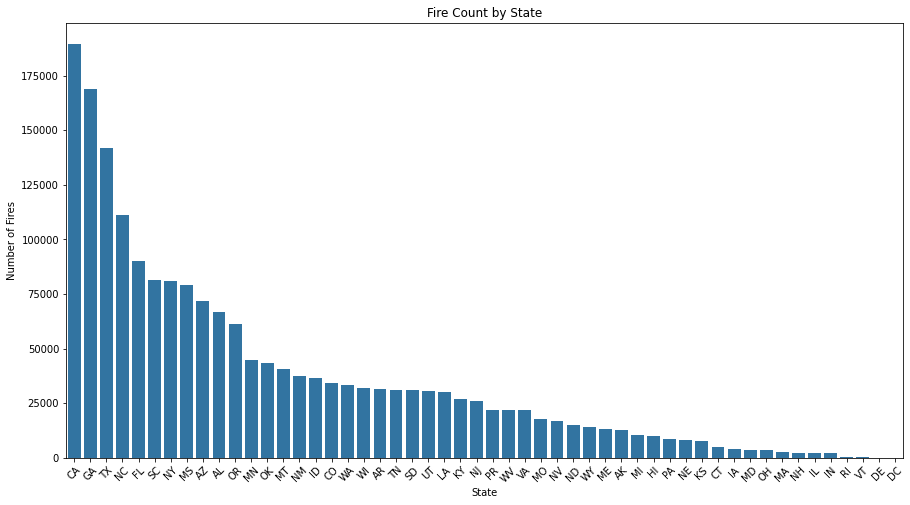

In [12]:
#TODO: Rajeev
#Visualize fire count by state
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming wildfireAnalysisDf is your DataFrame
fire_count_by_state = wildfireAnalysisDf.groupby('STATE').size().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
sns.barplot(x=fire_count_by_state.index, y=fire_count_by_state.values)
plt.xlabel('State')
plt.ylabel('Number of Fires')
plt.title('Fire Count by State')
plt.xticks(rotation=45)
plt.show()

In [31]:
# #TODO: Connor
# #Visualize lat/lon scattermap
# import plotly.express as px
# mapDf = wildfireAnalysisDf.where(wildfireAnalysisDf["FIRE_YEAR"] == 2015)
# fig = px.scatter_mapbox(mapDf, lat="LATITUDE", lon="LONGITUDE", center={"lat":45.75,"lon":-118.74}, hover_name="COUNTY", hover_data=["FIRE_YEAR", "FIRE_SIZE"],
#                         color_discrete_sequence=["fuchsia"], zoom=5, height=600, title="Wildfires in 2015")
# fig.update_layout(mapbox_style="open-street-map")
# fig.show()

In [18]:
# Find wildfire count by county
countyDf = wildfireAnalysisDf.groupby("STATE").size().to_frame('Count').sort_values(by=["Count"], ascending=False).reset_index()
countyDf.head()
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import plotly.express as px

fig = px.choropleth(countyDf, locations='STATE', color='Count',
    locationmode="USA-states",
    color_continuous_scale="Reds",
    scope="usa",
    labels={'Count':'Wildfire Count'},
    title="Wildfire Count By State"
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

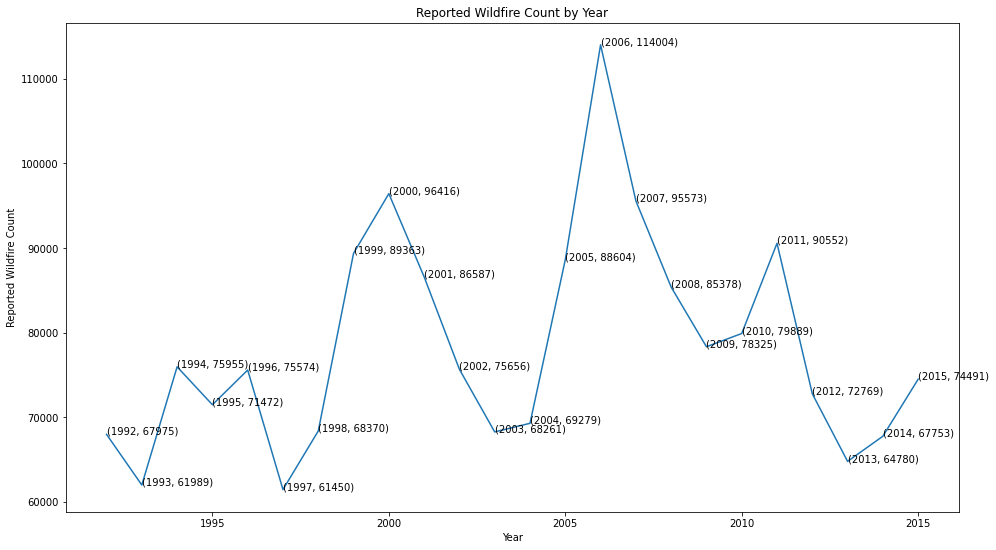

In [19]:
#TODO: Connor
#Visualize fire count over time
firesOverTimeDf = wildfireAnalysisDf.groupby("FIRE_YEAR").size().to_frame('Count').reset_index()
# create plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.plot(firesOverTimeDf["FIRE_YEAR"],firesOverTimeDf["Count"])
plt.xlabel("Year")
plt.ylabel("Reported Wildfire Count")
plt.title("Reported Wildfire Count by Year")
# add annotation to points
for (i, j) in zip(firesOverTimeDf["FIRE_YEAR"],firesOverTimeDf["Count"]):
    plt.text(i, j, f'({i}, {j})')

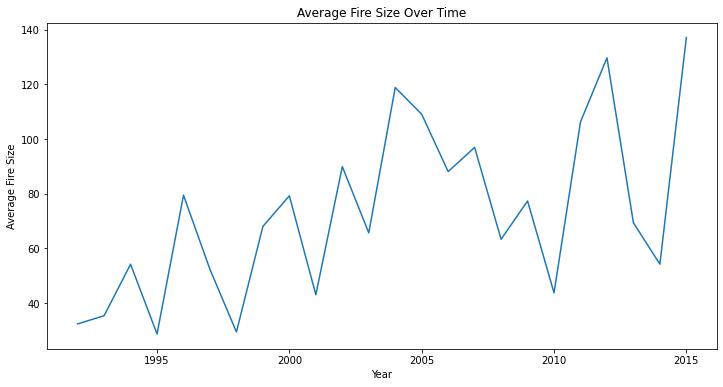

In [20]:
#TODO: Naveen
#Visualize avg fire size over time
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'wildfireAnalysisDf' is your DataFrame containing the wildfire data.

# Group the data by 'FIRE_YEAR' and calculate the average fire size for each year
avg_fire_size_per_year = wildfireAnalysisDf.groupby('FIRE_YEAR')['FIRE_SIZE'].mean()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_fire_size_per_year.index, y=avg_fire_size_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average Fire Size')
plt.title('Average Fire Size Over Time')

# Display the plot
plt.show()

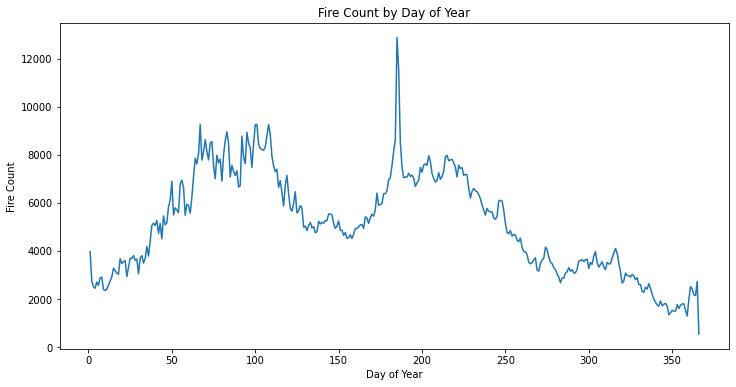

In [21]:
#TODO: Rajeev
#Plot fire count by DISCOVERY_DOY, or DISCOVERY_DATE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# For plotting fire count by DISCOVERY_DOY
fire_count_by_doy = wildfireAnalysisDf.groupby('DISCOVERY_DOY').size()
plt.figure(figsize=(12, 6))
sns.lineplot(x=fire_count_by_doy.index, y=fire_count_by_doy.values)
plt.xlabel('Day of Year')
plt.ylabel('Fire Count')
plt.title('Fire Count by Day of Year')
plt.show()

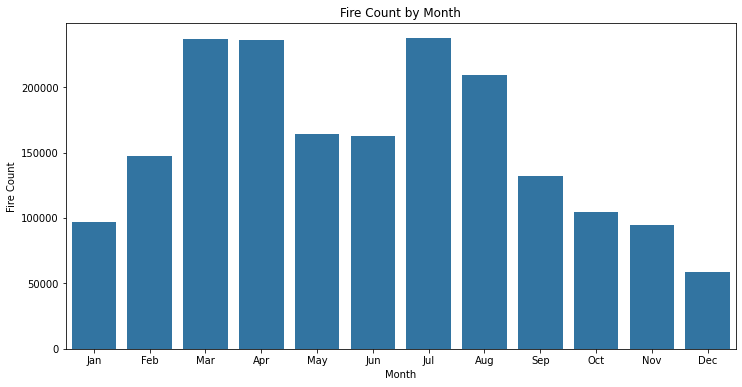

In [22]:
#Rajeev
# This script first converts the day of the year to the corresponding month
# and then plots the count of fires per month. The plot will provide a clear view of the monthly distribution of wildfire occurrences.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Function to convert day of the year to month
def doy_to_month(doy):
    # Using a non-leap year for conversion (e.g., 2021)
    date = datetime.strptime(f'2021-{doy}', '%Y-%j')
    return date.strftime('%b')  # %b gives the abbreviated month name

# Apply the conversion to the DISCOVERY_DOY column
wildfireAnalysisDf['DISCOVERY_MONTH'] = wildfireAnalysisDf['DISCOVERY_DOY'].apply(doy_to_month)

# Group by the new DISCOVERY_MONTH column and count the fires
fire_count_by_month = wildfireAnalysisDf.groupby('DISCOVERY_MONTH').size()

# Ordering the months correctly
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fire_count_by_month = fire_count_by_month.reindex(months_order)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=fire_count_by_month.index, y=fire_count_by_month.values)
plt.xlabel('Month')
plt.ylabel('Fire Count')
plt.title('Fire Count by Month')
plt.show()

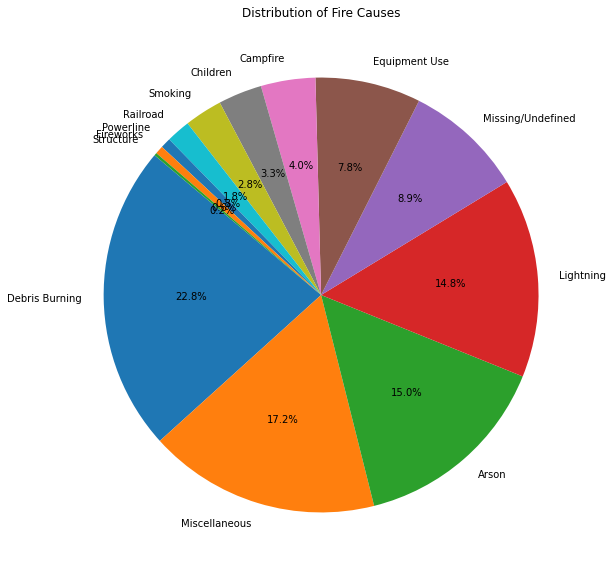

In [23]:
#TODO: Rajeev
# Fire Causes Distribution
fire_causes = wildfireAnalysisDf['STAT_CAUSE_DESCR'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(fire_causes, labels=fire_causes.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Fire Causes')
plt.show()

In [24]:
# import folium
# from folium.plugins import HeatMap

# # Sample a smaller subset of the data if it's too large, e.g., 10% of the data
# sampled_data = wildfireAnalysisDf.sample(frac=0.1)

# # Ensure that the data doesn't contain missing values in the 'LATITUDE' and 'LONGITUDE' columns
# sampled_data = sampled_data.dropna(subset=['LATITUDE', 'LONGITUDE'])

# # Create a base map - you might need to adjust the location and zoom_start based on your data
# map = folium.Map(location=[sampled_data['LATITUDE'].mean(), sampled_data['LONGITUDE'].mean()], zoom_start=5)

# # Define a gradient for better visualization
# gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}

# # Add a heat layer with adjusted parameters
# HeatMap(
#     list(zip(sampled_data['LATITUDE'], sampled_data['LONGITUDE'])),
#     radius=10,  
#     blur=15,    
#     max_zoom=1, 
#     gradient=gradient
# ).add_to(map)

# # Display the map
# map


In [25]:
#TODO: Naveen
#Create a new column of duration of fire (CONT_DOY-DISCOVERY_DOY)
# Assuming 'CONT_DOY' and 'DISCOVERY_DOY' are columns in your DataFrame
wildfireAnalysisDf['FIRE_DURATION'] = wildfireAnalysisDf['CONT_DOY'] - wildfireAnalysisDf['DISCOVERY_DOY']

# Handle cases where the fire spans over the new year
wildfireAnalysisDf['FIRE_DURATION'] = wildfireAnalysisDf['FIRE_DURATION'].apply(lambda x: x if x >= 0 else x + 365)

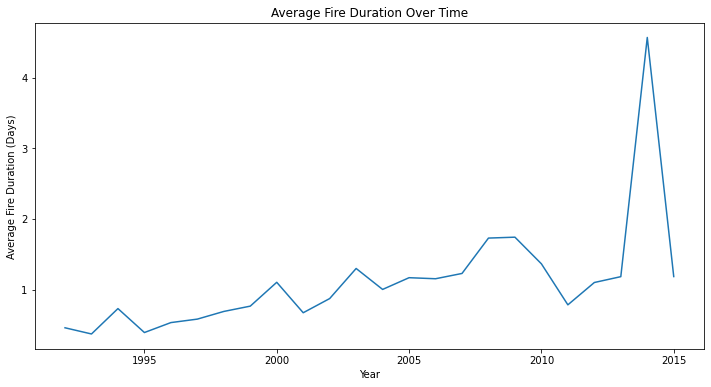

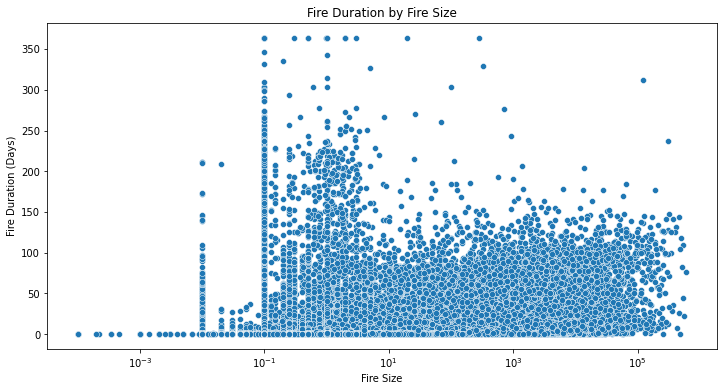

In [26]:
#TODO: Naveen
#Plot Duration by time
#Plot duration by Fire_Size
import matplotlib.pyplot as plt
import seaborn as sns

# Group by FIRE_YEAR and calculate the average fire duration for each year
avg_duration_per_year = wildfireAnalysisDf.groupby('FIRE_YEAR')['FIRE_DURATION'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_duration_per_year.index, y=avg_duration_per_year.values)
plt.xlabel('Year')
plt.ylabel('Average Fire Duration (Days)')
plt.title('Average Fire Duration Over Time')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='FIRE_SIZE', y='FIRE_DURATION', data=wildfireAnalysisDf)
plt.xlabel('Fire Size')
plt.ylabel('Fire Duration (Days)')
plt.title('Fire Duration by Fire Size')
plt.xscale('log')  # Optional: Use logarithmic scale if fire sizes vary widely
plt.show()

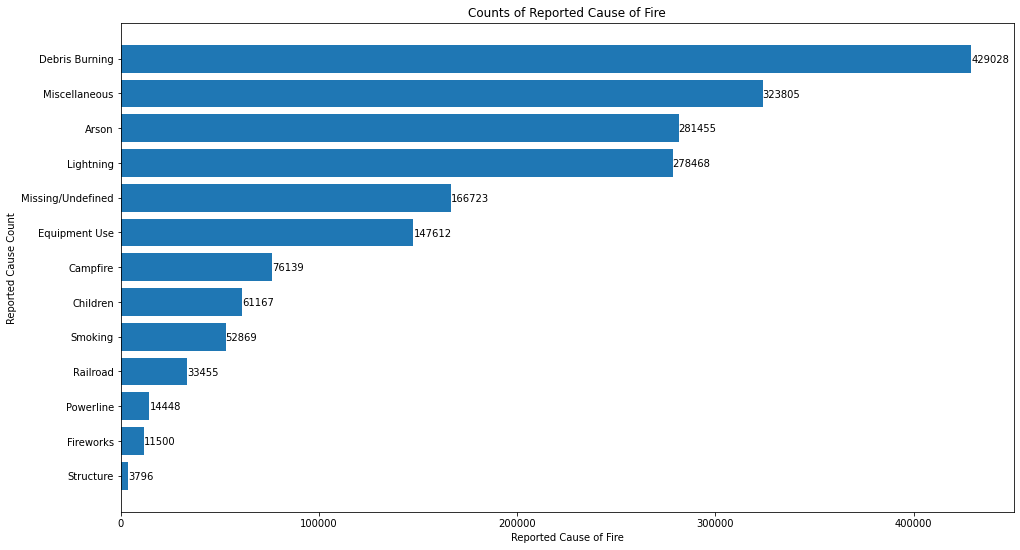

In [27]:
#TODO: Connor
#Visualize fire count by STAT_CAUSE_CODE/desc (cause), label with description
fireCausesDf = wildfireAnalysisDf.groupby("STAT_CAUSE_DESCR").size().to_frame('Count').sort_values(by=["Count"], ascending=False).reset_index()
# create plot
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(fireCausesDf["STAT_CAUSE_DESCR"],fireCausesDf["Count"])
# add title and labels
plt.xlabel("Reported Cause of Fire")
plt.ylabel("Reported Cause Count")
plt.title("Counts of Reported Cause of Fire")
# invert order so highest first
plt.gca().invert_yaxis()
# add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
        str(round((i.get_width()), 2)))

In [28]:
# Naveen - Logistic Regression
# Objective: Train a logistic regression model to predict the cause of the fire (categorical variable STAT_CAUSE_DESCR).

# Data Preprocessing:

# Handle missing values in relevant columns.
# Convert categorical variables to dummy variables (One-Hot Encoding) as needed.
# Split the data into features (X) and target (y) where y is STAT_CAUSE_DESCR.
# Model Training and Validation:

# Split the dataset into training and testing sets.
# Train a logistic regression model on the training set.
# Validate the model on the testing set using appropriate metrics (accuracy, confusion matrix, etc.).
# Feature Selection and Tuning:

# Use techniques like backward elimination or regularization to select significant features.
# Tune hyperparameters of the logistic regression model for better performance if necessary.

In [29]:
# Connor - Linear Regression
# Objective: Train a linear regression model to predict the size of a wildfire (continuous variable FIRE_SIZE).

# Data Preprocessing:

# Address any missing or outlier values in FIRE_SIZE and other relevant features.
# Normalize/standardize continuous variables if required.
# Convert categorical data to numerical format using encoding methods.
# Model Training and Validation:

# Split the data into training and testing sets.
# Train a linear regression model on the training set.
# Evaluate the model's performance using metrics like R-squared, RMSE (Root Mean Squared Error).
# Model Diagnostics:

# Check for assumptions of linear regression (linearity, homoscedasticity, normality, independence).
# Adjust the model or features if assumptions are violated.

In [30]:
# Rajeev - PCA with Models
# Objective: Apply PCA in combination with logistic and linear regression models to improve performance and interpretability.

# PCA Implementation:

# Standardize the dataset (PCA is affected by scale).
# Implement PCA to reduce dimensions while retaining most of the variance.
# Determine the number of principal components to keep.
# Integration with Models:

# Use the principal components as features in logistic and linear regression models.
# Train both models (logistic for fire cause prediction and linear for fire size prediction) using these components.
# Evaluation and Comparison:

# Evaluate the performance of models with PCA against the models without PCA.
# Compare the results and provide insights on the effectiveness of PCA in this context.

In [ ]:
# # Visualizations based on your models. Say 3 visuals for each model
# Naveen - 3 visuals for Logistic Regression
# Connor - 3 visuals for Linear Regression
# Rajeev - 3 visuals for PCA with Models

In [ ]:
# # Conclusion
# Naveen - Conclusion for Logistic Regression
# Connor - Conclusion for Linear Regression
# Rajeev - Conclusion for PCA with Models

# over all conclusion

**PROJECT PLAN**

**Initial Data Assessment**

Data Quality Check: Quickly assess the completeness, accuracy, and consistency of the data.

Missing Values Identification: Identify missing data in each column and analyze the pattern of missingness.

Outliers and Inconsistencies Detection: Use statistical methods and visualizations to detect outliers and data inconsistencies.

Dataset Structure Evaluation: Understand the relationships between different tables and columns in the dataset.

*Data Cleaning*

Handle Missing Values: Decide whether to impute or remove missing data based on its impact.

Correct Anomalies/Outliers: Address outliers and anomalies using appropriate statistical methods.

*Data Transformation*

Normalize/Standardize Variables: Apply scaling to continuous variables for linear regression.

Categorical Variable Conversion: Convert categorical data using encoding methods suitable for logistic regression.

Feature Engineering: Create or transform features to enhance model performance.

*Data Reduction*

Dataset Downsizing: If necessary, use stratified sampling to manage the dataset's size, ensuring it remains representative.

*Efficiency and Scalability*

Optimize Data Processes: Improve the efficiency of data loading and transformation.

Parallel Processing/Cloud Solutions: Consider parallel processing or cloud-based solutions for handling large datasets.

**Exploratory Analysis**
Above visuals (**DONE**)

**Modelling**

*Logistic Regression (Predicting the Cause of the Fire)*
Feature Selection: Identify and select relevant features for the logistic regression model.

Data Splitting: Split the dataset into training and testing sets.

Model Training: Train the logistic regression model on the training set.

Model Validation: Validate the model's performance on the test set using metrics like accuracy, precision, recall, and confusion matrix.

Hyperparameter Tuning: Tune the model parameters for better performance, if necessary.

Model Interpretation: Interpret the model coefficients to understand the influence of various features.

*Linear Regression (Predicting the Size of the Wildfire)*
Feature Selection and Preparation: Choose relevant features for the linear regression model and ensure they meet the assumptions of linear regression.

Data Splitting: Divide the data into training and test subsets.

Model Training: Fit the linear regression model on the training data.

Model Evaluation: Assess the model on the testing data using metrics like R-squared and RMSE (Root Mean Squared Error).

Assumption Validation: Check for linear regression assumptions like linearity, homoscedasticity, and normality of residuals.

Adjustments and Refinements: Make necessary adjustments based on model diagnostics and retrain the model if needed.

*PCA (Principal Component Analysis) - Optional*
Standardization: Standardize the dataset before applying PCA.

PCA Application: Apply PCA to reduce dimensions and select the number of principal components.

Model Integration: Use PCA components as features in both logistic and linear regression models.

Model Training and Evaluation: Train and evaluate the models using the principal components and compare the performance with non-PCA models.

**Post-Modeling Visualization and Analysis**

*Model Performance Metrics Visualization:*

Create charts to visually represent model accuracy, confusion matrices, ROC curves for logistic regression, and residual plots for linear regression.
Use bar charts or line graphs to display R-squared values, RMSE, or other relevant metrics.

*Feature Importance Analysis:*

Visualize the importance or coefficients of different features in the models. This can be done using bar charts for logistic regression coefficients and linear regression beta coefficients.
Highlight key predictors and discuss their impact on the model's predictions.

*Predictions Visualization:*

Plot the predicted vs. actual values to assess the model’s predictive performance.
For logistic regression, visualize the probability distributions of different classes.

*Error Analysis:*

Examine where the models perform well and where they do not. Use scatter plots or heatmaps for error distribution.
Analyze patterns in the residuals for linear regression to identify any systematic errors.

*Temporal or Geospatial Trends (if applicable):*

If the models include time or location data, create time series plots or geographic heatmaps to show predictions or model accuracy over time or across different locations.

*Comparative Analysis (if using PCA):*

Compare the performance of models with and without PCA. Visualize the differences in performance metrics.
Discuss the trade-offs in complexity and interpretability when using dimensionality reduction techniques like PCA.

*Insights and Conclusions:*

Summarize the key findings from the models in a clear, concise manner.
Create dashboards or comprehensive visual reports that encapsulate the entire analysis for stakeholder presentations.

*Interactive Visualizations (Optional):*

If resources allow, create interactive visualizations (using tools like Plotly or Dash) to allow stakeholders to explore the data and model results dynamically.